In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [82]:
# cp-----chest pain
# trestbps: resting blood pressure 
# chol: serum cholestoral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl)  
# restecg: resting electrocardiographic results
#           Value 0: normal
#           Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
#                 elevation or depression of > 0.05 mV)
#           Value 2: showing probable or definite left ventricular hypertrophy

# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
#         -- Value 1: upsloping
#         -- Value 2: flat
#         -- Value 3: downsloping

# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [24]:
df.shape

(1025, 14)

In [25]:
df.isnull().sum().sum()

0

In [41]:
df.duplicated().sum()
# (723/1025)*100
# It takes 70% duplicates value

723

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [188]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:xlabel='age'>

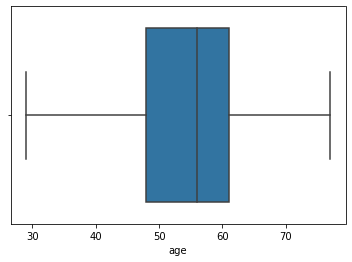

In [12]:
sns.boxplot(x=df["age"])

In [13]:
df["age"].min()

29

In [14]:
df["age"].max()

77

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

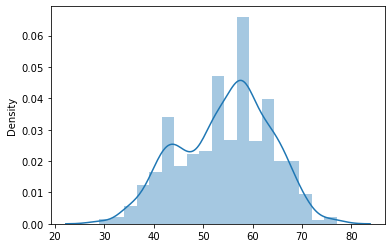

In [16]:
sns.distplot(x=df["age"])

<AxesSubplot:xlabel='trestbps'>

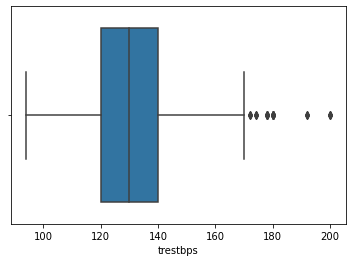

In [134]:
sns.boxplot(x=df["trestbps"])

In [143]:
q1=df["trestbps"].quantile(0.25)
print("Q1 : ",q1)
q3=df["trestbps"].quantile(0.75)
print("Q3 : ",q3)
iqr=q3-q1
print("IQR: ",iqr)
positive_oulier=q3+1.5*iqr
print("positive_oulier",positive_oulier)
negative_outlier = q1-1.5*iqr
print("negative_outlier",negative_outlier)

Q1 :  120.0
Q3 :  140.0
IQR:  20.0
positive_oulier 170.0
negative_outlier 90.0


In [154]:
# df[df["trestbps"]>170]
# 172,174,178,180,192,200

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

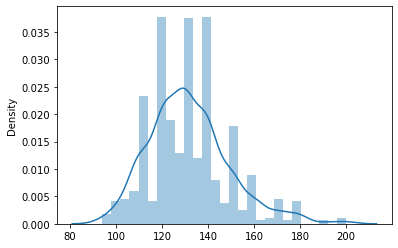

In [138]:
sns.distplot(x=df["trestbps"])

In [43]:
# duplicate = df[df.duplicated()]
# duplicate

In [42]:
# df.drop_duplicates()

<AxesSubplot:xlabel='sex', ylabel='count'>

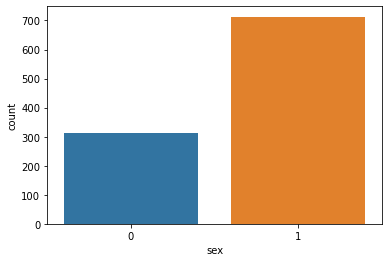

In [52]:
# figure, axis = plt.subplots(7,2, figsize=(12,27))
sns.countplot(x = df['sex'])

In [54]:
# the number of males is more than females

In [55]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

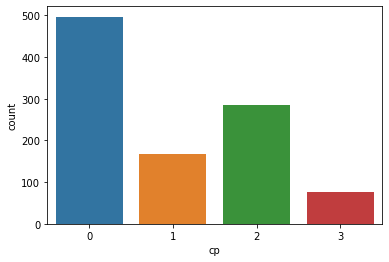

In [56]:
sns.countplot(x = df['cp'])

In [57]:
# cp is denotes the chest pain , it has 4 categories , almost 50 % people belong to 0 category 
# which is typical angina and other 25 % people belong to 2 category ,which is non-anginal pain.

<AxesSubplot:xlabel='fbs', ylabel='count'>

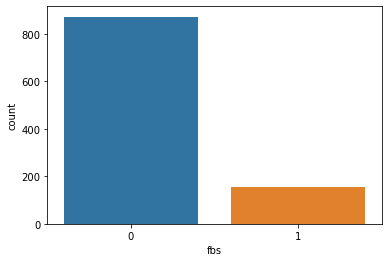

In [61]:
sns.countplot(x=df["fbs"])

In [62]:
# fbs denotes the fasting blood sugar ,it is good 84 % people has not fasting blood sugar

In [63]:
df["fbs"].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [79]:
(871/1025)*100

84.97560975609755

In [90]:
df["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='count'>

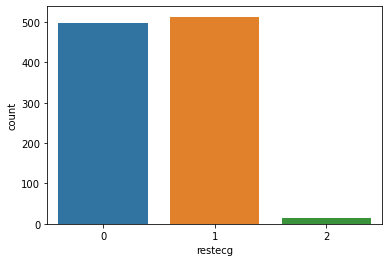

In [83]:
sns.countplot(x=df["restecg"])

In [95]:
restecg_0 =  (df["restecg"].value_counts()[0]/df.shape[0])*100
restecg_0

48.48780487804878

In [96]:
restecg_1 =  (df["restecg"].value_counts()[1]/df.shape[0])*100
restecg_1

50.048780487804876

In [97]:
restecg_2 =  (df["restecg"].value_counts()[2]/df.shape[0])*100
restecg_2

1.4634146341463417

In [99]:
# for restecg
# 48.48% people ------------normal 
# 50.04% people ------------having ST-T wave abnormality
# 1.46% people -------------definite left ventricular hypertrophy

<AxesSubplot:xlabel='exang', ylabel='count'>

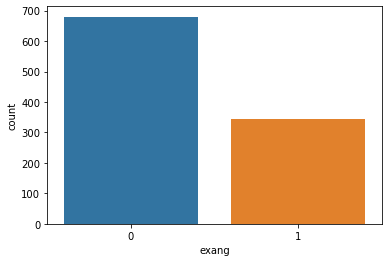

In [102]:
sns.countplot(x=df["exang"])

In [107]:
exang_0 =  (df["exang"].value_counts()[0]/df.shape[0])*100
exang_0

66.34146341463415

In [108]:
exang_1 =  (df["exang"].value_counts()[1]/df.shape[0])*100
exang_1

33.65853658536586

In [ ]:
# 66.34% people has not exang (exercise induced angina)
# 33.65% people has exang.

<AxesSubplot:xlabel='slope', ylabel='count'>

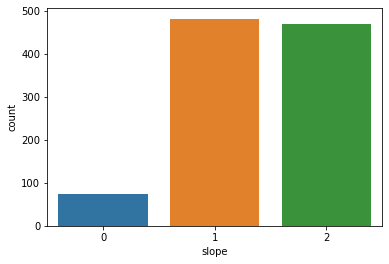

In [116]:
sns.countplot(x=df["slope"])

In [122]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

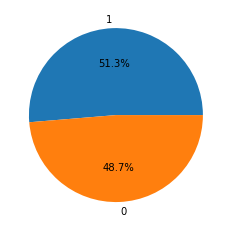

In [125]:
plt.pie(df["target"].value_counts(),autopct="%0.1f%%",labels=["1",'0'])
plt.show()

<AxesSubplot:xlabel='target', ylabel='age'>

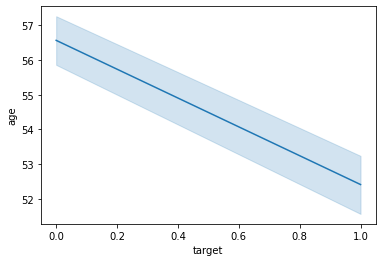

In [132]:
sns.lineplot(x=df["target"],y=df["age"],data=df)

<AxesSubplot:xlabel='target', ylabel='age'>

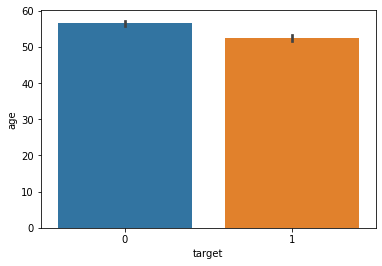

In [171]:
sns.barplot(x=df["target"],y=df["age"])

In [155]:
# 51.3% people has heart diease
# 48.7% people has not heart dieases

<AxesSubplot:xlabel='sex', ylabel='target'>

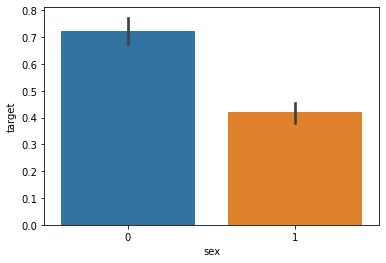

In [169]:
sns.barplot(x=df["sex"],y=df["target"])

# the chances of heart diease in male is less than then the chances in female

<AxesSubplot:xlabel='cp', ylabel='target'>

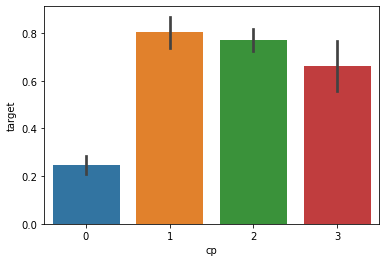

In [168]:
sns.barplot(x=df["cp"],y=df["target"])

# if chest pain is belong to 1 & 2 categories there is more chances for heart dieases
# if chest pain is belong to 3 categories there is less chances for heart dieases comaper to 1&2
# if chest pain is belong to 0 categories there minimum chances for heart dieases
# 

<AxesSubplot:xlabel='fbs', ylabel='target'>

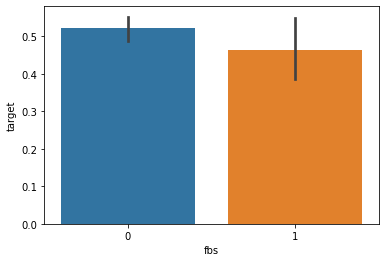

In [178]:
sns.barplot(x=df["fbs"],y=df["target"])

# fbs is belong to 1 category , less chances of heart dieases

<AxesSubplot:xlabel='target', ylabel='chol'>

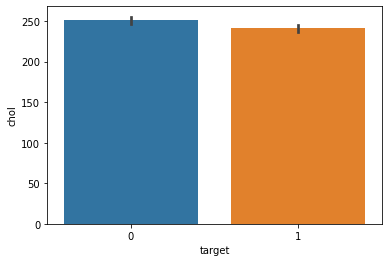

In [181]:
sns.barplot(x=df["target"],y=df["chol"])

<AxesSubplot:xlabel='fbs', ylabel='restecg'>

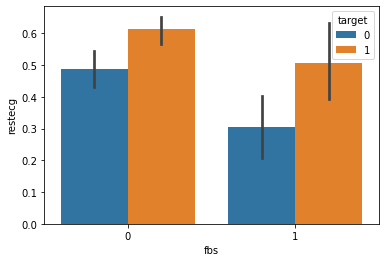

In [187]:
sns.barplot(x=df["fbs"],y=df["restecg"],hue=df["target"])

<AxesSubplot:xlabel='restecg', ylabel='target'>

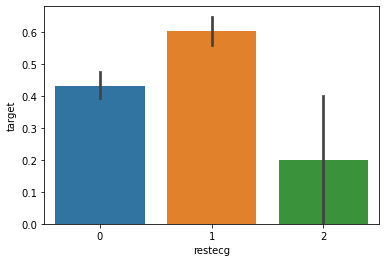

In [191]:
sns.barplot(x=df["restecg"],y=df["target"])

# restecg belong to 1 category there is more chance fot heart dieases

In [109]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

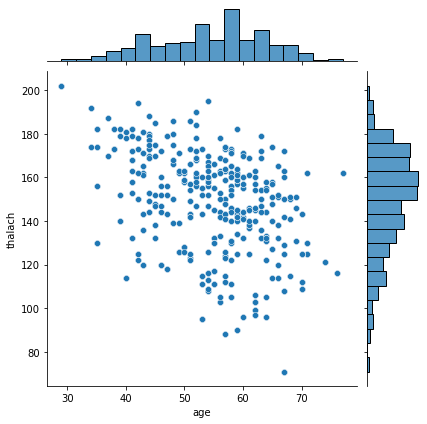

In [201]:
sns.jointplot(x=df["age"],y=df["thalach"])